## Observations and Insights

### Analysis

* There was a correlation between mouse weight and tumor volume, which indicated that the mouses weight may contribute to the effectivness of the drug administered

* The amount of Male mice and Female mice used in the study was almost identical

* There was one potential outlier in the Infubinol regimin. Most of the mice showed an increase in tumor volume, there was a single mouse that had a reduction in tumor volume.

* per the data Capomulin seemed to be a viable drug regimen to reduce tumor volume



## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


g989    13
a699    10
y163    10
w575    10
n304    10
        ..
v199     1
x226     1
u153     1
h428     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

	Mouse ID	Timepoint	Tumor Volume (mm3)	Metastatic Sites
0	b128	0	45.000000	0
1	f932	0	45.000000	0
2	g107	0	45.000000	0
3	a457	0	45.000000	0
4	c819	0	45.000000	0
...	...	...	...	...
1888	r944	45	41.581521	2
1889	u364	45	31.023923	3
1890	p438	45	61.433892	1
1891	x773	45	58.634971	4
1892	b879	45	72.555239	2
1893 rows × 4 columns

	Mouse ID	Drug Regimen	Sex	Age_months	Weight (g)
0	k403	Ramicane	Male	21	16
1	s185	Capomulin	Female	3	17
2	x401	Capomulin	Female	16	15
3	m601	Capomulin	Male	22	17
4	g791	Ramicane	Male	11	16
...	...	...	...	...	...
244	z314	Stelasyn	Female	21	28
245	z435	Propriva	Female	12	26
246	z581	Infubinol	Female	24	25
247	z795	Naftisol	Female	13	29
248	z969	Naftisol	Male	9	30
249 rows × 5 columns

['Mouse ID',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)']


## Summary statistics
###### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



In [3]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#create a Data Frame to work through this section
gr_drug_timepoint_df = combined_df
#create multiple series to and piece them together at the end
mean_s = gr_drug_timepoint_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_s = gr_drug_timepoint_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_s = gr_drug_timepoint_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'] 
sd_s = gr_drug_timepoint_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_s = gr_drug_timepoint_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
stat_summary = pd.DataFrame({"Mean Tumor Volume":mean_s,
                             "Median Tumor Volume":median_s,
                             "Tumor Volume Variance": variance_s,
                             "Tumor Volume Standard Deviation": sd_s,
                             "Tumor Volume SEM": sem_s})
stat_summary





                                           

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots
###### Generate a bar plot showing number of data points for each treatment regimen using pandas

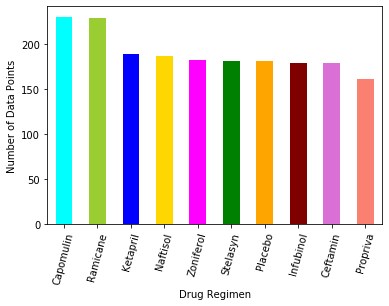

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#again new dataframe for this section
colors = ['aqua', 'yellowgreen', 'blue', 'gold', 'fuchsia', 'green', 'orange', 'maroon', 'orchid', 'salmon']
treatment_df = combined_df
treatment = treatment_df['Drug Regimen'].value_counts()

treatment.plot(kind="bar",color = colors   )
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 75)

plt.ylabel("Number of Data Points")
plt.show()


###### Generate a bar plot showing number of data points for each treatment regimen using pyplot

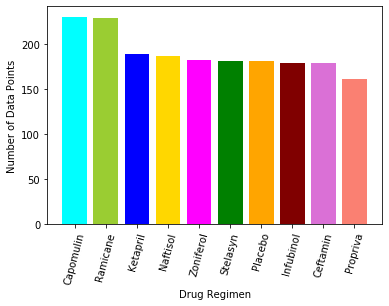

In [5]:
treatment = treatment_df['Drug Regimen'].value_counts()
plt.bar(treatment.index.values,treatment.values,color = colors )
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 75)
plt.ylabel("Number of Data Points")

plt.show()
#print(f"{treatment_df['Drug Regimen'].value_counts()}")

## Pie plots

###### Generate a pie plot showing the distribution of female versus male mice using pandas

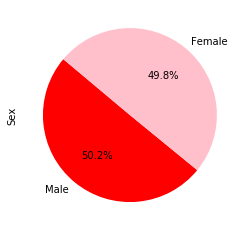

In [6]:
mouse_sex_s = mouse_metadata.Sex.value_counts()
mouse_sex_s.plot(kind="pie",autopct="%1.1f%%",startangle=140,colors =["red", "pink"] )

###### Generate a pie plot showing the distribution of female versus male mice using pyplot

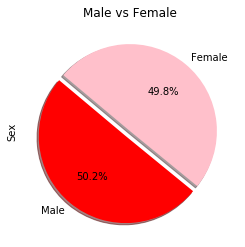

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# The colors of each section of the pie chart
colors = ["red", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.075, 0)
plt.pie(mouse_sex_s.values, labels= mouse_sex_s.index.values, autopct="%1.1f%%", colors=colors,
        explode=explode, shadow=True, startangle=140)
plt.ylabel("Sex")
plt.title("Male vs Female")
plt.show()

## Quartiles, outliers and boxplots

###### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#first get the most recent timepoint on each mouse
maximum_tumor_size = combined_df.groupby(["Mouse ID"]).max()
print(maximum_tumor_size)
maximum_tumor_size = maximum_tumor_size.reset_index()
print(maximum_tumor_size)
#merge this Dataframe to with the original Dataframe to get the tumor size at the last timepoint and to tie it to new index
merge_tumor = maximum_tumor_size[['Mouse ID', 'Timepoint']].merge(combined_df,on=['Mouse ID','Timepoint'],how='left')

merge_tumor

capomulin = merge_tumor.loc[merge_tumor['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = merge_tumor.loc[merge_tumor['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = merge_tumor.loc[merge_tumor['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = merge_tumor.loc[merge_tumor['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

          Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
Mouse ID                                                                 
a203             45           67.973419                 2    Infubinol   
a251             45           65.525743                 1    Infubinol   
a262             45           70.717621                 4      Placebo   
a275             45           62.999356                 3     Ceftamin   
a366             30           63.440686                 1     Stelasyn   
...             ...                 ...               ...          ...   
z435             10           48.710661                 0     Propriva   
z578             45           45.000000                 0     Ramicane   
z581             45           62.754451                 3    Infubinol   
z795             45           65.741070                 3     Naftisol   
z969             45           73.867845                 4     Naftisol   

             Sex  Age_months  Weight 

In [9]:
#Quantatively determine capomulin outliers
capo_quartiles = capomulin.quantile([.25,.5,.75])
capo_lower_q = capo_quartiles[.25]
capo_upper_q = capo_quartiles[.75]
capo_iqr = capo_upper_q-capo_lower_q
capo_lower_boundry = capo_lower_q - (1.5*capo_iqr)
capo_upper_boundry = capo_upper_q + (1.5*capo_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin<capo_lower_boundry) | (capomulin > capo_upper_boundry)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [10]:
#Quantatively determine Rameicane outliers
rame_quartiles = ramicane.quantile([.25,.5,.75])
rame_lower_q = rame_quartiles[.25]
rame_upper_q = rame_quartiles[.75]
rame_iqr = rame_upper_q-rame_lower_q
rame_lower_boundry = rame_lower_q - (1.5*rame_iqr)
rame_upper_boundry = rame_upper_q + (1.5*rame_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane<rame_lower_boundry) | (ramicane > rame_upper_boundry)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [11]:
#Quantatively determine ceftamin outliers
ceft_quartiles = ceftamin.quantile([.25,.5,.75])
ceft_lower_q = ceft_quartiles[.25]
ceft_upper_q = ceft_quartiles[.75]
ceft_iqr = ceft_upper_q-ceft_lower_q
ceft_lower_boundry = ceft_lower_q - (1.5*ceft_iqr)
ceft_upper_boundry = ceft_upper_q + (1.5*ceft_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin<ceft_lower_boundry) | (ceftamin > ceft_upper_boundry)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [12]:
#Quantatively determine infubinol outliers
infu_quartiles = infubinol.quantile([.25,.5,.75])
infu_lower_q = infu_quartiles[.25]
infu_upper_q = infu_quartiles[.75]
infu_iqr = infu_upper_q-infu_lower_q
infu_lower_boundry = infu_lower_q - (1.5*infu_iqr)
infu_upper_boundry = infu_upper_q + (1.5*infu_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol<infu_lower_boundry) | (infubinol > infu_upper_boundry)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


###### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

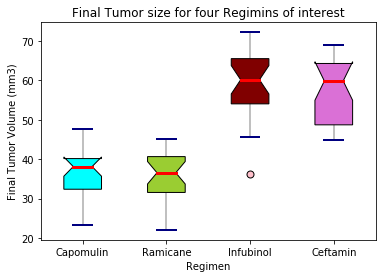

In [13]:
#generate a box plot of the final tumor volume for each mouse across four regimens of interest

r_outliers = dict(markerfacecolor="pink",markersize=7)
box = plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops = r_outliers, patch_artist=True,notch=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor size for four Regimins of interest')
plt.xlabel('Regimen')
colors = ['cyan', 'yellowgreen', 'maroon', 'orchid']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set(color='red', linewidth=3)
for cap in box['caps']:
    cap.set(color='navy', linewidth=2)
for whisker in box['whiskers']:
    whisker.set(color='silver', linewidth=2)
plt.show()
# the colors match the bar graphs from above 

## Line and scatter plots

###### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

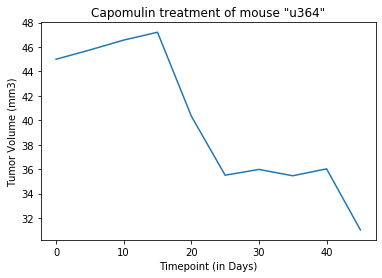

In [14]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = combined_df.loc[combined_df['Drug Regimen']=='Capomulin']
capomulin_data.head(10)
mouse = capomulin_data.loc[capomulin_data['Mouse ID'] == 'u364']
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])
plt.xlabel ('Timepoint (in Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse "u364"')
plt.show()
 

###### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

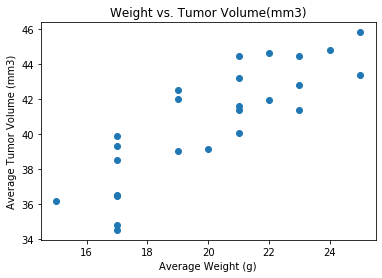

In [15]:
capomulin_avg = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')
plt.title('Weight vs. Tumor Volume(mm3)')
plt.show()

###### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The correlation between the mouse weight and the average tumor volume is 0.84


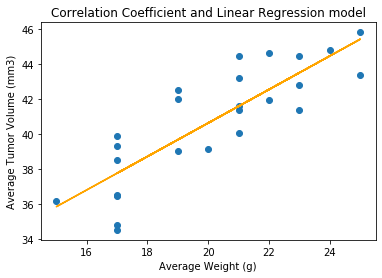

In [16]:
corr_reg = round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between the mouse weight and the average tumor volume is {corr_reg}")
reg_mod = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
values4y = capomulin_avg['Weight (g)'] * reg_mod[0]+reg_mod[1]
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],values4y,color = 'orange')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')
plt.title('Correlation Coefficient and Linear Regression model')
plt.show()

# This is the Readme.md


Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

Laboratory

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.
Instructions

###### Your tasks are to do the following:

    Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

    Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of data points for each treatment regimen.

###### NOTE: These plots should look identical.

    Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

        NOTE: These plots should look identical.

    Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

    Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

    Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.

    Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

    Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

    Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

    Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

###### Here are some final considerations:

    You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

    See the starter workbook for help on what modules to import and expected format of the notebook.

###### Hints and Considerations

    Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

    You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.

    Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.

    While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.

    Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:

        How does my DataFrame need to be structured for me to have the right x-axis and y-axis?

        How do I build a basic scatter plot?

        How do I add a label to that scatter plot?

        Where would the labels for that scatter plot come from?

        Again, don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of bite-sized tasks.

    Get help when you need it! There is never any shame in asking. But, as always, ask a specific question. You'll never get a great answer to "I'm lost."

# This is the Rubric


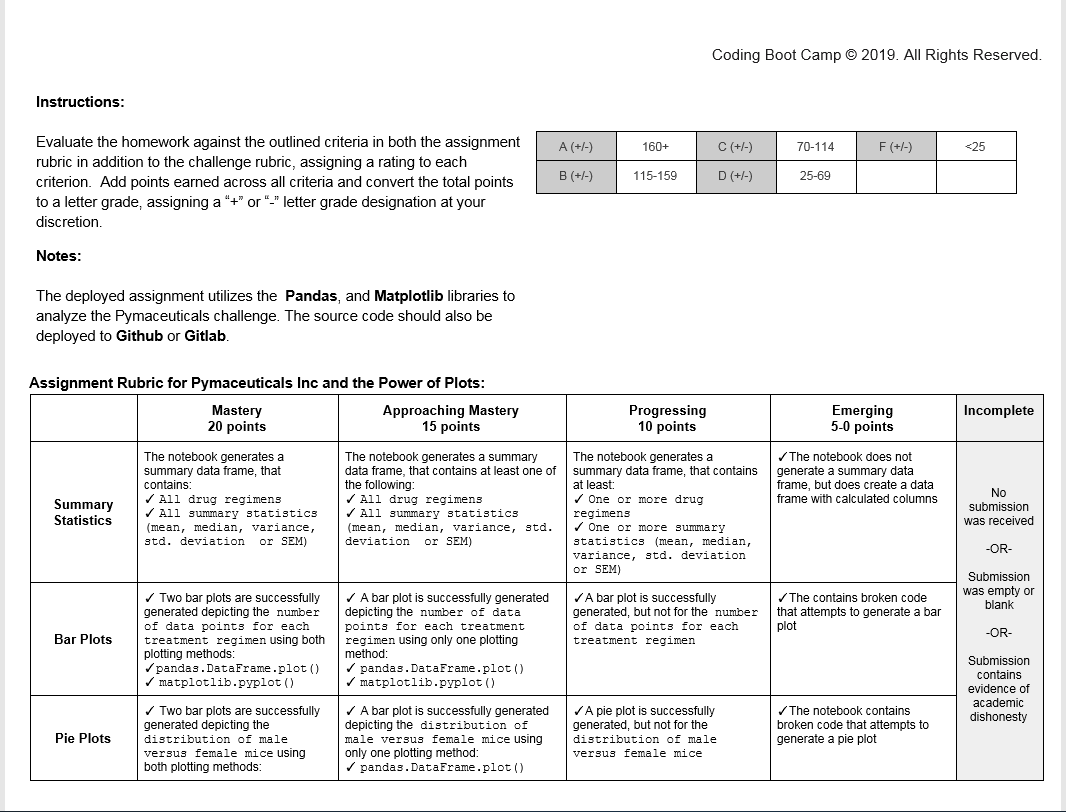

In [17]:
from IPython.display import Image
from IPython.display import IFrame

PATH = "rubric_images/"
Image(filename = PATH + "rubric1.png", width=1000, height=1000)






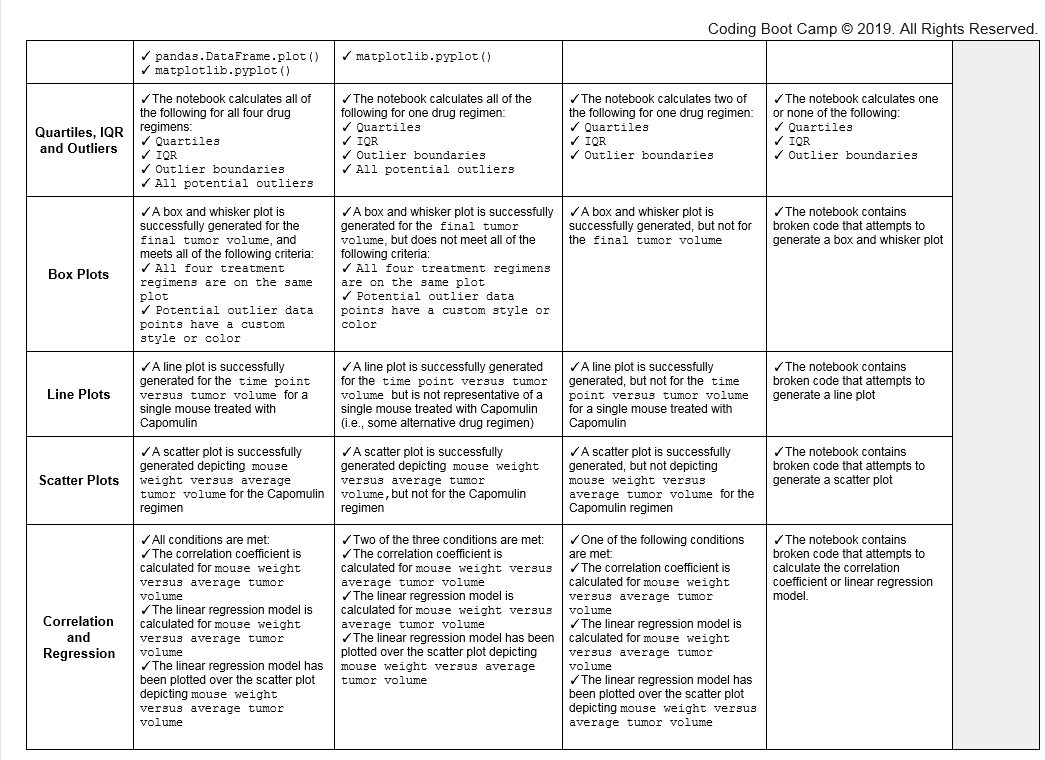

In [18]:
Image(filename = PATH + "rubric2.png")


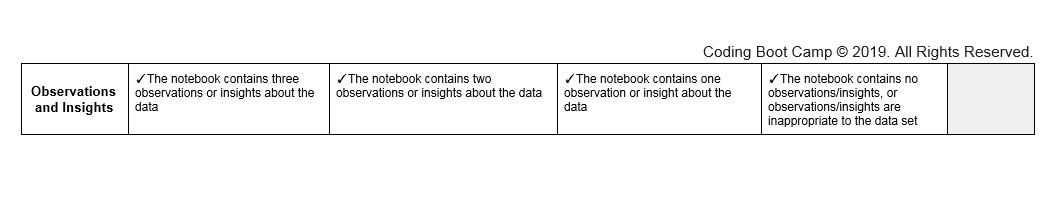

In [19]:
Image(filename = PATH + "rubric3.png")